In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import glob

In [70]:
# 파일 경로 패턴 설정 (여기서는 forecast_*.csv 파일만 가져옴)
file_list = glob.glob('../data/raw/forecast_*.csv')

# 모든 파일을 읽어서 하나의 데이터프레임으로 합치기
df_list = [pd.read_csv(file, encoding='euc-kr') for file in file_list]
forecast_df = pd.concat(df_list, ignore_index=True)

#일시 데이트타임 적용
forecast_df['일시'] = pd.to_datetime(forecast_df['일시'])

forecast_df['연도'] = forecast_df['일시'].dt.year
forecast_df['월'] = forecast_df['일시'].dt.month
forecast_df['일'] = forecast_df['일시'].dt.day
forecast_df['시간'] = forecast_df['일시'].dt.hour
forecast_df['요일'] = forecast_df['일시'].dt.day_name().str[:3]
forecast_df = forecast_df.drop("일시", axis = 1)

# 결측치 제거
forecast_df.fillna(0, inplace=True)

#데이터 타입 숫자인지 확인????
numeric_columns = forecast_df.select_dtypes(include=['float64', 'int64']).columns
forecast_df[numeric_columns] = forecast_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


# 결과 확인
forecast_df.head()

,지점,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),연도,월,일,시간,요일
0,22105,6.4,284.0,9.3,1027.5,48.0,3.2,14.8,3.5,2.0,1.4,8.0,41.0,2020,1,1,0,Wed
1,22105,6.6,309.0,9.6,1026.7,44.0,3.0,14.8,3.7,1.9,1.4,8.0,45.0,2020,1,1,1,Wed
2,22105,7.3,292.0,10.7,1026.6,50.0,3.4,14.8,3.4,2.2,1.6,8.0,43.0,2020,1,1,2,Wed
3,22105,7.7,294.0,11.1,1026.6,47.0,2.8,14.8,3.2,1.9,1.3,5.8,22.0,2020,1,1,3,Wed
4,22105,7.4,292.0,10.5,1025.9,54.0,3.1,14.8,3.1,2.0,1.4,8.0,45.0,2020,1,1,4,Wed


In [88]:
# File paths
file_paths = glob.glob('../data/raw/forecast_*.csv')

# Read and concatenate all files
df_list = [pd.read_csv(file, encoding='euc-kr') for file in file_paths]
forecast_df = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
forecast_df.head()

,지점,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,22105,2020-01-01 00:00,6.4,284.0,9.3,1027.5,48.0,3.2,14.8,3.5,2.0,1.4,8.0,41.0
1,22105,2020-01-01 01:00,6.6,309.0,9.6,1026.7,44.0,3.0,14.8,3.7,1.9,1.4,8.0,45.0
2,22105,2020-01-01 02:00,7.3,292.0,10.7,1026.6,50.0,3.4,14.8,3.4,2.2,1.6,8.0,43.0
3,22105,2020-01-01 03:00,7.7,294.0,11.1,1026.6,47.0,2.8,14.8,3.2,1.9,1.3,5.8,22.0
4,22105,2020-01-01 04:00,7.4,292.0,10.5,1025.9,54.0,3.1,14.8,3.1,2.0,1.4,8.0,45.0


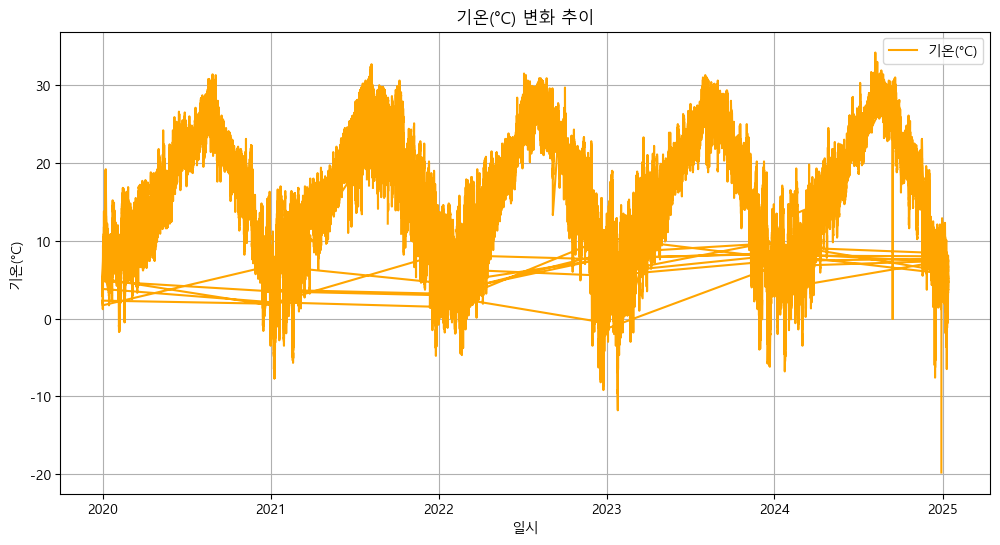

KeyError: '연도'

<Figure size 1200x600 with 0 Axes>

In [89]:
# Convert the '일시' column to datetime format
forecast_df['일시'] = pd.to_datetime(forecast_df['일시'])

# Set the '일시' column as the index
forecast_df.set_index('일시', inplace=True)

# Plot temperature (기온) trend
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['기온(°C)'], label='기온(°C)', color='orange')
plt.title('기온(°C) 변화 추이')
plt.xlabel('일시')
plt.ylabel('기온(°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot temperature (기온) trend
plt.figure(figsize=(12, 6))
plt.plot(forecast_df["연도"], forecast_df['기온(°C)'], label='기온(°C)', color='orange')
plt.title('기온(°C) 변화 추이')
plt.xlabel('일시')
plt.ylabel('기온(°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot water temperature (수온) trend
plt.figure(figsize=(12, 6))
plt.plot(forecast_df["연도"], forecast_df['수온(°C)'], label='수온(°C)', color='blue')
plt.title('수온(°C) 변화 추이')
plt.xlabel('일시')
plt.ylabel('수온(°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot significant wave height (유의파고) trend
plt.figure(figsize=(12, 6))
plt.plot(forecast_df["연도"], forecast_df['유의파고(m)'], label='유의파고(m)', color='green')
plt.title('유의파고(m) 변화 추이')
plt.xlabel('일시')
plt.ylabel('유의파고(m)')
plt.legend()
plt.grid(True)
plt.show()